# **Proyek Analisis Data: Bike Sharing Dataset**
- **Nama:** Arizal Anshori
- **Email:** 2210631160030@student.unsika.ac.id
- **ID Dicoding:** arizal26

## Menentukan Pertanyaan Bisnis

- Apa saja tren musiman dalam penyewaan sepeda?
- Bagaimana kondisi cuaca mempengaruhi penyewaan sepeda?

## Import Semua Packages/Library yang Digunakan

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [6]:
# Load the datasets
hour_df = pd.read_csv('/content/sample_data/hour.csv')
day_df = pd.read_csv('/content/sample_data/day.csv')

In [7]:
# Display the first few rows of the hourly data
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [8]:
# Display the first few rows of the daily data
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


**Insight:**
- xxx
- xxx

### Data Preprocessing

In [46]:
# Convert date columns to datetime
hour_df['dteday'] = pd.to_datetime(hour_df['dteday'])
day_df['dteday'] = pd.to_datetime(day_df['dteday'])

### Assessing Data

#### Menilai tabel `hour_df`

In [48]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

In [49]:
hour_df.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
hr,0
holiday,0
weekday,0
workingday,0
weathersit,0


In [50]:
print("Jumlah duplikasi: ", hour_df.duplicated().sum())

Jumlah duplikasi:  0


In [51]:
hour_df.describe()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2012-01-02 04:08:34.552045568,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
min,1.0000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2011-07-04 00:00:00,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,2012-01-02 00:00:00,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,2012-07-02 00:00:00,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599


In [52]:
hour_df.nunique()

,0
instant,17379
dteday,731
season,4
yr,2
mnth,12
hr,24
holiday,2
weekday,7
workingday,2
weathersit,4


#### Menilai tabel `day_df`

In [53]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

In [54]:
day_df.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


In [55]:
print("Jumlah duplikasi: ", day_df.duplicated().sum())

Jumlah duplikasi:  0


In [56]:
day_df.describe()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2012-01-01 00:00:00,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452


In [57]:
day_df.nunique()

,0
instant,731
dteday,731
season,4
yr,2
mnth,12
holiday,2
weekday,7
workingday,2
weathersit,3
temp,499


**Insight:**
- xxx
- xxx

### Cleaning Data

#### Membersihkan tabel `hour_df`

##### Duplicate data

In [58]:
hour_df.duplicated().sum()

0

In [59]:
hour_df.drop_duplicates(inplace=True)

In [60]:
print("Jumlah duplikasi: ", hour_df.duplicated().sum())

Jumlah duplikasi:  0


##### Missing values

In [61]:
hour_df.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
hr,0
holiday,0
weekday,0
workingday,0
weathersit,0


In [62]:
hour_df[hour_df.casual.isna()]

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt


In [63]:
hour_df.casual.value_counts()

,count
casual,
0,1581
1,1082
2,798
3,697
4,561
...,...
332,1
361,1
356,1


In [64]:
hour_df.fillna(value="Prefer not to say", inplace=True)

In [65]:
hour_df.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
hr,0
holiday,0
weekday,0
workingday,0
weathersit,0


##### Inaccurate value

In [66]:
hour_df.describe()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2012-01-02 04:08:34.552045568,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
min,1.0000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2011-07-04 00:00:00,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,2012-01-02 00:00:00,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,2012-07-02 00:00:00,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599


#### Membersihkan tabel `day_df`

In [67]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

##### Memperbaiki tipe data

In [68]:
datetime_columns = ["dteday"]

for column in datetime_columns:
  day_df[column] = pd.to_datetime(day_df[column])

In [69]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

In [70]:
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


**Insight:**
- xxx
- xxx

## Exploratory Data Analysis (EDA)

### Explore `hour_df`

In [71]:
hour_df.sample(5)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
3186,3187,2011-05-17,2,0,5,16,0,2,1,1,0.62,0.6061,0.61,0.3284,73,217,290
17169,17170,2012-12-23,1,1,12,4,0,0,0,1,0.20,0.2121,0.47,0.1343,1,3,4
15438,15439,2012-10-10,4,1,10,11,0,3,1,1,0.54,0.5152,0.52,0.1940,53,238,291
7386,7387,2011-11-09,4,0,11,9,0,3,1,1,0.34,0.3636,0.93,0.0000,22,197,219
15867,15868,2012-10-28,4,1,10,8,0,0,0,2,0.50,0.4848,0.59,0.5522,55,118,173


In [72]:
hour_df.describe(include="all")

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2012-01-02 04:08:34.552045568,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
min,1.0000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2011-07-04 00:00:00,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,2012-01-02 00:00:00,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,2012-07-02 00:00:00,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599


In [73]:
hour_df.instant.is_unique

True

In [74]:
hour_df.instant.duplicated

<bound method Series.duplicated of 0            1
1            2
2            3
3            4
4            5
         ...  
17374    17375
17375    17376
17376    17377
17377    17378
17378    17379
Name: instant, Length: 17379, dtype: int64>

In [75]:
hour_df.groupby(by="dteday").agg({
    "instant": "nunique",
    "yr": ["max", "min", "mean", "std", ],
    "mnth": ["max", "min", "mean", "std", ],
    "hr": ["max", "min", "mean", "std", ]
})

instant  yr               mnth                 hr                 \
           nunique max min mean  std  max min  mean  std max min       mean   
dteday                                                                        
2011-01-01      24   0   0  0.0  0.0    1   1   1.0  0.0  23   0  11.500000   
2011-01-02      23   0   0  0.0  0.0    1   1   1.0  0.0  23   0  11.782609   
2011-01-03      22   0   0  0.0  0.0    1   1   1.0  0.0  23   0  12.318182   
2011-01-04      23   0   0  0.0  0.0    1   1   1.0  0.0  23   0  11.869565   
2011-01-05      23   0   0  0.0  0.0    1   1   1.0  0.0  23   0  11.869565   
...            ...  ..  ..  ...  ...  ...  ..   ...  ...  ..  ..        ...   
2012-12-27      24   1   1  1.0  0.0   12  12  12.0  0.0  23   0  11.500000   
2012-12-28      24   1   1  1.0  0.0   12  12  12.0  0.0  23   0  11.500000   
2012-12-29      24   1   1  1.0  0.0   12  12  12.0  0.0  23   0  11.500000   
2012-12-30      24   1   1  1.0  0.0   12  12  12.0  0.0  23   0  11.500000   
2012-12-31      24   1   1  1.0  0.0   12  12  12.0  0.0  23   0  11.500000   

                      
                 std  
dteday                
2011-01-01  7.071068  
2011-01-02  7.090048  
2011-01-03  6.806064  
2011-01-04  6.988981  
2011-01-05  6.988981  
...              ...  
2012-12-27  7.071068  
2012-12-28  7.071068  
2012-12-29  7.071068  
2012-12-30  7.071068  
2012-12-31  7.071068  

[731 rows x 13 columns]

In [76]:
hour_df.groupby(by="registered").instant.nunique().sort_values(ascending=False)

,instant
registered,
4,307
3,294
5,287
6,266
2,245
...,...
707,1
706,1
600,1


In [81]:
hour_df.groupby(by="casual").instant.nunique().sort_values(ascending=False)

,instant
casual,
0,1581
1,1082
2,798
3,697
4,561
...,...
297,1
298,1
299,1


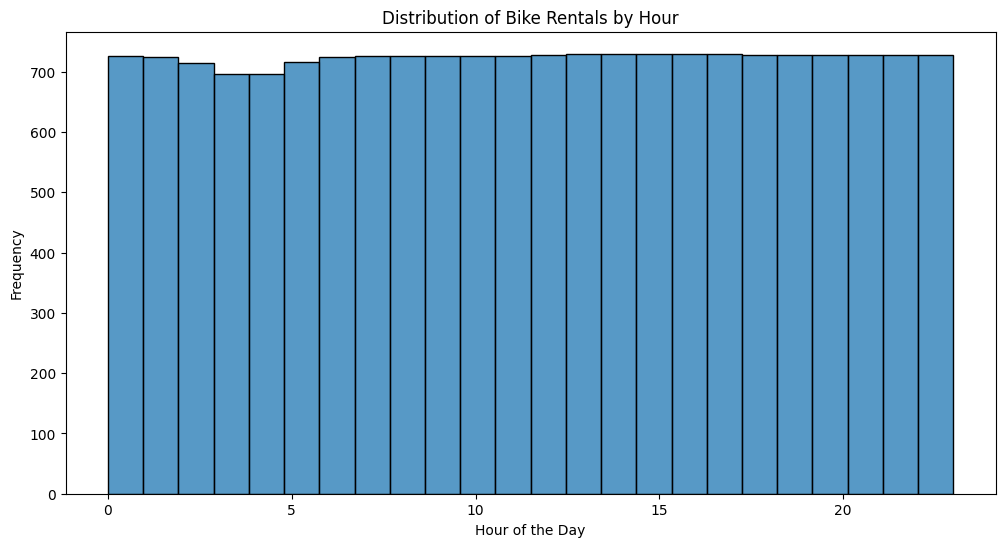

In [77]:
# Plot the distribution of bike rentals by hour
plt.figure(figsize=(12, 6))
sns.histplot(hour_df['hr'], bins=24, kde=False)
plt.title('Distribution of Bike Rentals by Hour')
plt.xlabel('Hour of the Day')
plt.ylabel('Frequency')
plt.show()

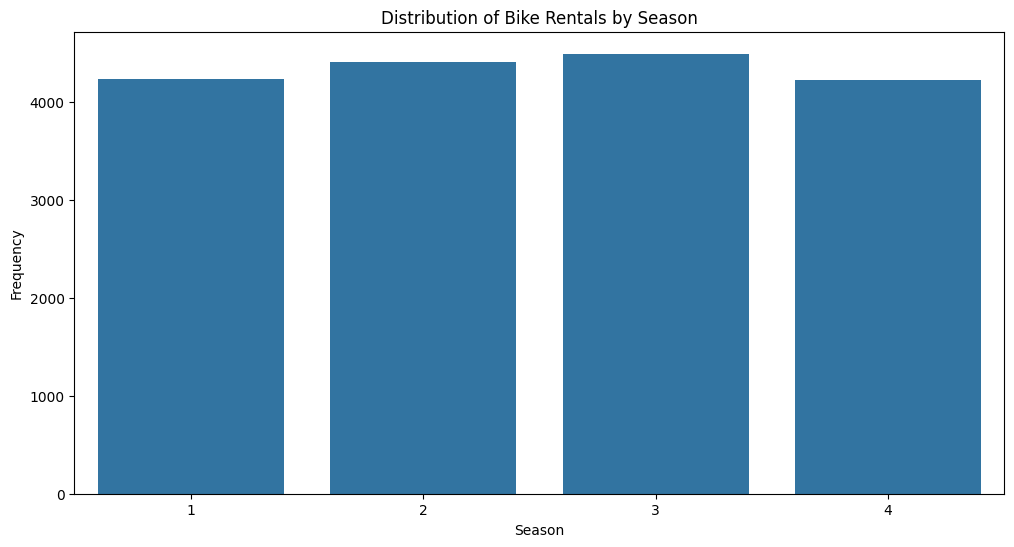

In [78]:
# Plot the distribution of bike rentals by season
plt.figure(figsize=(12, 6))
sns.countplot(x='season', data=hour_df)
plt.title('Distribution of Bike Rentals by Season')
plt.xlabel('Season')
plt.ylabel('Frequency')
plt.show()

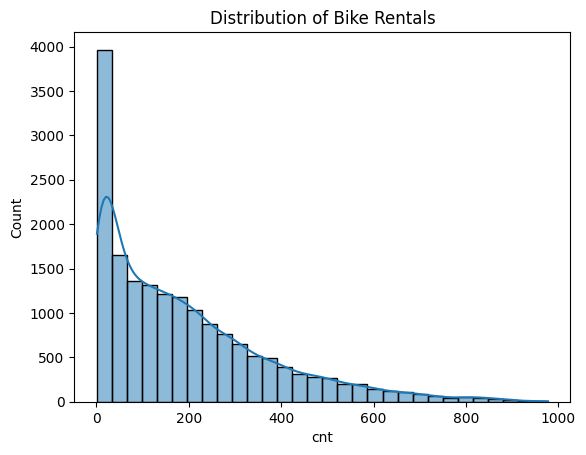

In [80]:
sns.histplot(hour_df['cnt'], bins=30, kde=True)
plt.title('Distribution of Bike Rentals')
plt.show()

### Explore `day_df`

In [82]:
day_df.sample(5)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
334,335,2011-12-01,4,0,12,0,4,1,1,0.312500,0.305554,0.524583,0.220158,182,3545,3727
320,321,2011-11-17,4,0,11,0,4,1,2,0.341667,0.323221,0.575833,0.305362,139,2914,3053
420,421,2012-02-25,1,1,2,0,6,0,1,0.290833,0.255675,0.395833,0.421642,317,2415,2732
416,417,2012-02-21,1,1,2,0,2,1,1,0.287826,0.295113,0.594348,0.205717,163,3614,3777
452,453,2012-03-28,2,1,3,0,3,1,1,0.484167,0.470950,0.481250,0.291671,674,5024,5698


In [83]:
day_df.describe(include="all")

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2012-01-01 00:00:00,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452


<Axes: >

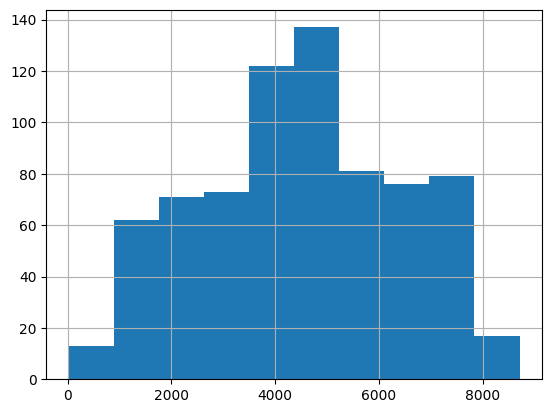

In [84]:
day_df.cnt.hist()

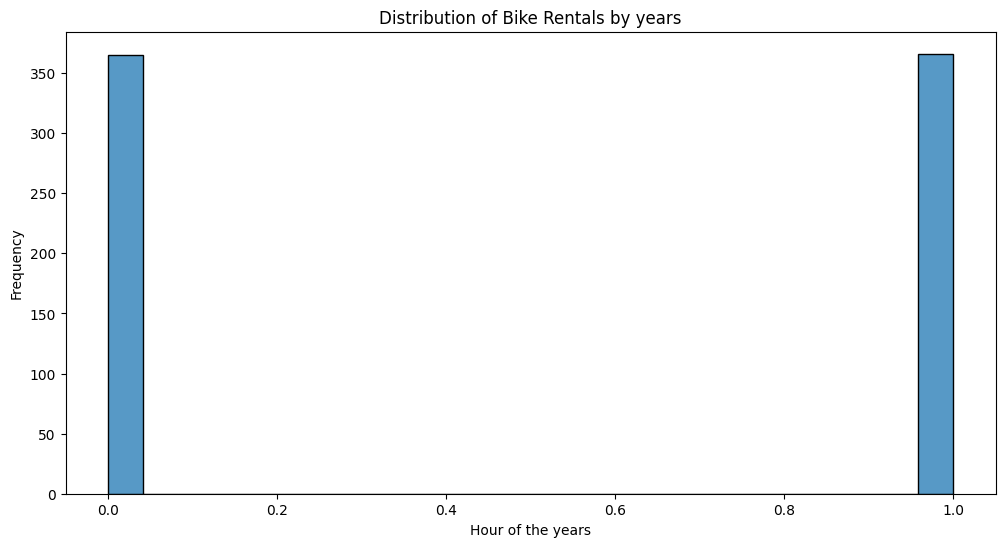

In [98]:
# Plot the distribution of bike rentals by years
plt.figure(figsize=(12, 6))
sns.histplot(day_df['yr'], bins=24, kde=False)
plt.title('Distribution of Bike Rentals by years')
plt.xlabel('Hour of the years')
plt.ylabel('Frequency')
plt.show()

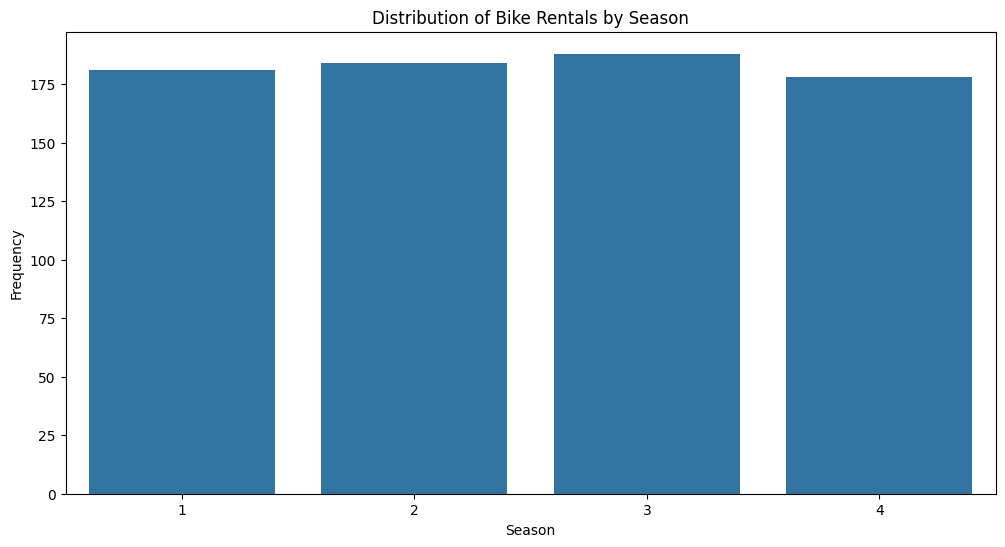

In [99]:
# Plot the distribution of bike rentals by season
plt.figure(figsize=(12, 6))
sns.countplot(x='season', data=day_df)
plt.title('Distribution of Bike Rentals by Season')
plt.xlabel('Season')
plt.ylabel('Frequency')
plt.show()

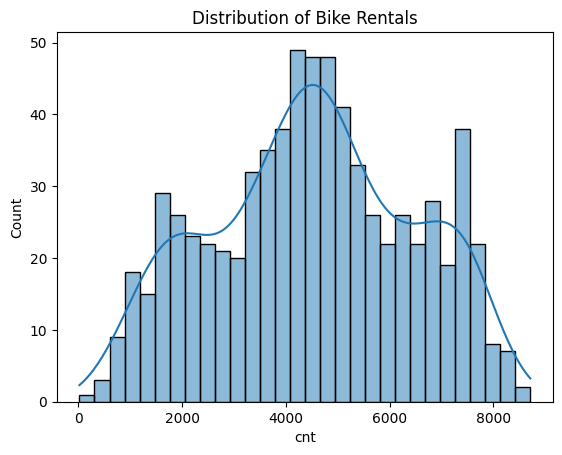

In [100]:
sns.histplot(day_df['cnt'], bins=30, kde=True)
plt.title('Distribution of Bike Rentals')
plt.show()

### Explore `hour_df` & `day_df`

#### Menggabungkan data `hour_df` dan `day_df`

In [101]:
day_hour_df = pd.merge(
    left=day_df,
    right=hour_df,
    how="left",
    left_on="instant",
    right_on="instant"
)
day_hour_df.head()

,instant,dteday_x,season_x,yr_x,mnth_x,holiday_x,weekday_x,workingday_x,weathersit_x,temp_x,...,weekday_y,workingday_y,weathersit_y,temp_y,atemp_y,hum_y,windspeed_y,casual_y,registered_y,cnt_y
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,...,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,...,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,...,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,...,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,...,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [104]:
day_hour_df.groupby(by="casual_y").instant.nunique().sort_values(ascending=False).head(10)

,instant
casual_y,
0,202
1,103
3,75
2,70
4,45
5,39
6,34
7,27
8,20


In [106]:
day_hour_df.groupby(by="registered_y").instant.nunique().sort_values(ascending=False).head(10)

,instant
registered_y,
1,38
2,28
3,23
5,15
6,15
55,12
49,11
26,11
50,10


In [107]:
day_hour_df.groupby(by="cnt_y").instant.nunique().sort_values(ascending=False).head(10)

,instant
cnt_y,
1,36
3,27
2,26
5,16
52,12
8,12
28,12
59,11
36,11


### Explore all data

#### Menghubungkan semua data

In [108]:
all_df = pd.merge(
    left=day_df,
    right=hour_df,
    how="left",
    left_on="instant",
    right_on="instant"
)
all_df.head()

,instant,dteday_x,season_x,yr_x,mnth_x,holiday_x,weekday_x,workingday_x,weathersit_x,temp_x,...,weekday_y,workingday_y,weathersit_y,temp_y,atemp_y,hum_y,windspeed_y,casual_y,registered_y,cnt_y
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,...,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,...,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,...,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,...,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,...,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [109]:
all_df.groupby(by=["dteday_x", "season_x"]).agg({
    "casual_y": "sum",
    "cnt_y": "sum"
})

,,casual_y,cnt_y
dteday_x,season_x,,
2011-01-01,1,3,16
2011-01-02,1,8,40
2011-01-03,1,5,32
2011-01-04,1,3,13
2011-01-05,1,0,1
...,...,...,...
2012-12-27,1,10,76
2012-12-28,1,8,103
2012-12-29,1,7,190


In [111]:
all_df.groupby(by=["dteday_x", "weekday_x"]).agg({
    "casual_x": "sum",
    "cnt_x": "sum"
})

,,casual_x,cnt_x
dteday_x,weekday_x,,
2011-01-01,6,331,985
2011-01-02,0,131,801
2011-01-03,1,120,1349
2011-01-04,2,108,1562
2011-01-05,3,82,1600
...,...,...,...
2012-12-27,4,247,2114
2012-12-28,5,644,3095
2012-12-29,6,159,1341


In [112]:
all_df.groupby(by=["dteday_x", "workingday_x"]).agg({
    "casual_x": "sum",
    "cnt_x": "sum"
})

,,casual_x,cnt_x
dteday_x,workingday_x,,
2011-01-01,0,331,985
2011-01-02,0,131,801
2011-01-03,1,120,1349
2011-01-04,1,108,1562
2011-01-05,1,82,1600
...,...,...,...
2012-12-27,1,247,2114
2012-12-28,1,644,3095
2012-12-29,0,159,1341


In [113]:
all_df.groupby(by=["dteday_x", "temp_x"]).agg({
    "casual_x": "sum",
    "cnt_x": "sum"
})

,,casual_x,cnt_x
dteday_x,temp_x,,
2011-01-01,0.344167,331,985
2011-01-02,0.363478,131,801
2011-01-03,0.196364,120,1349
2011-01-04,0.200000,108,1562
2011-01-05,0.226957,82,1600
...,...,...,...
2012-12-27,0.254167,247,2114
2012-12-28,0.253333,644,3095
2012-12-29,0.253333,159,1341


In [114]:
all_df.groupby(by="dteday_x").agg({
    "casual_x": "nunique",
    "cnt_x": "sum"
}).sort_values(by="cnt_x", ascending=False)

,casual_x,cnt_x
dteday_x,,
2012-09-15,1,8714
2012-09-29,1,8555
2012-09-22,1,8395
2012-03-23,1,8362
2012-05-19,1,8294
...,...,...
2011-03-06,1,605
2011-01-26,1,506
2012-12-26,1,441


In [122]:
all_df.to_csv("all_data.csv", index=False)

**Insight:**
- xxx
- xxx

## Visualization & Explanatory Analysis

### Pertanyaan 1: Apa saja tren musiman dalam penyewaan sepeda?

In [115]:
day_df.head(), hour_df.head()

(   instant     dteday  season  yr  mnth  holiday  weekday  workingday  \
 0        1 2011-01-01       1   0     1        0        6           0   
 1        2 2011-01-02       1   0     1        0        0           0   
 2        3 2011-01-03       1   0     1        0        1           1   
 3        4 2011-01-04       1   0     1        0        2           1   
 4        5 2011-01-05       1   0     1        0        3           1   
 
    weathersit      temp     atemp       hum  windspeed  casual  registered  \
 0           2  0.344167  0.363625  0.805833   0.160446     331         654   
 1           2  0.363478  0.353739  0.696087   0.248539     131         670   
 2           1  0.196364  0.189405  0.437273   0.248309     120        1229   
 3           1  0.200000  0.212122  0.590435   0.160296     108        1454   
 4           1  0.226957  0.229270  0.436957   0.186900      82        1518   
 
     cnt  
 0   985  
 1   801  
 2  1349  
 3  1562  
 4  1600  ,
    instant

<ipython-input-116-a2b320fcf5db>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='season', y='cnt', data=seasonal_rentals, palette='coolwarm')
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping

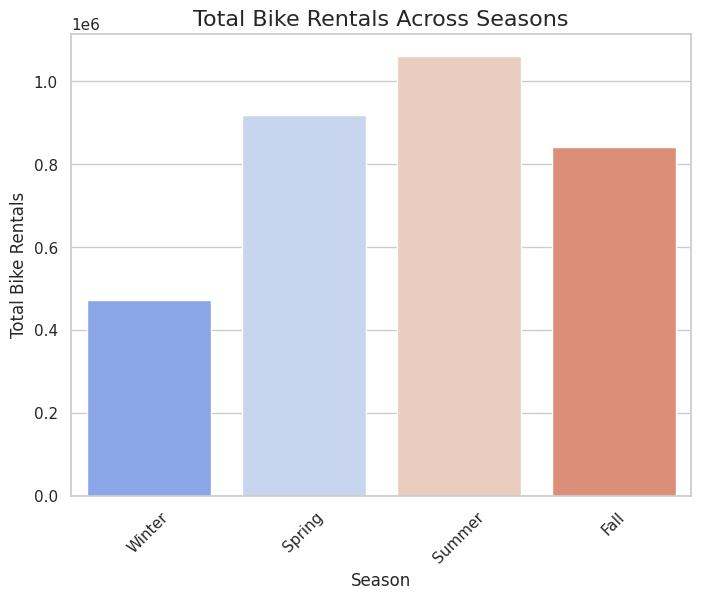

In [116]:
# Set up the visualization style
sns.set(style="whitegrid")

# Group by season to get total bike rentals per season
seasonal_rentals = day_df.groupby('season')['cnt'].sum().reset_index()

# Create a dictionary to map season numbers to season names
season_names = {1: "Winter", 2: "Spring", 3: "Summer", 4: "Fall"}
seasonal_rentals['season'] = seasonal_rentals['season'].map(season_names)

# Plotting the seasonal trends
plt.figure(figsize=(8, 6))
sns.barplot(x='season', y='cnt', data=seasonal_rentals, palette='coolwarm')
plt.title('Total Bike Rentals Across Seasons', fontsize=16)
plt.xlabel('Season', fontsize=12)
plt.ylabel('Total Bike Rentals', fontsize=12)
plt.xticks(rotation=45)
plt.show()

### Pertanyaan 2: Bagaimana kondisi cuaca mempengaruhi penyewaan sepeda?

<ipython-input-117-7937926f6a8d>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='weathersit', y='cnt', data=weather_rentals, palette='coolwarm')
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When group

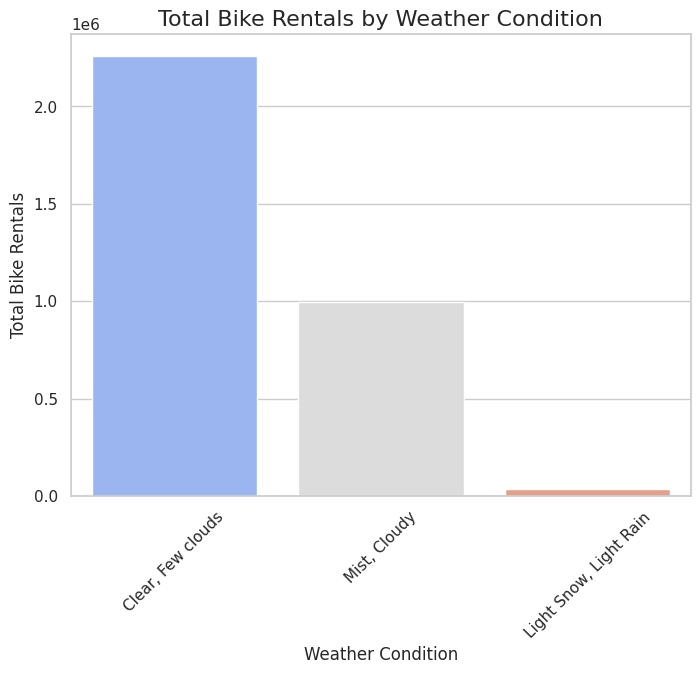

In [117]:
# Group by weathersit to get the total bike rentals for each weather condition
weather_rentals = day_df.groupby('weathersit')['cnt'].sum().reset_index()

# Map weather situation codes to descriptions
weather_conditions = {1: "Clear, Few clouds", 2: "Mist, Cloudy", 3: "Light Snow, Light Rain", 4: "Heavy Rain, Snow"}
weather_rentals['weathersit'] = weather_rentals['weathersit'].map(weather_conditions)

# Plotting the effect of weather conditions on bike rentals
plt.figure(figsize=(8, 6))
sns.barplot(x='weathersit', y='cnt', data=weather_rentals, palette='coolwarm')
plt.title('Total Bike Rentals by Weather Condition', fontsize=16)
plt.xlabel('Weather Condition', fontsize=12)
plt.ylabel('Total Bike Rentals', fontsize=12)
plt.xticks(rotation=45)
plt.show()

**Insight:**
- mengetahui jumlah total penyewaan sepeda (cnt) di berbagai musim untuk mengetahui musim mana yang memiliki jumlah penyewaan tertinggi dan terendah.
- Menganalisis pengaruh situasi cuaca yang berbeda (cuaca) terhadap jumlah penyewaan sepeda. Mengidentifikasi bagaimana kondisi cuaca yang berbeda berkorelasi dengan permintaan penyewaan.

## Analisis Lanjutan (Opsional)

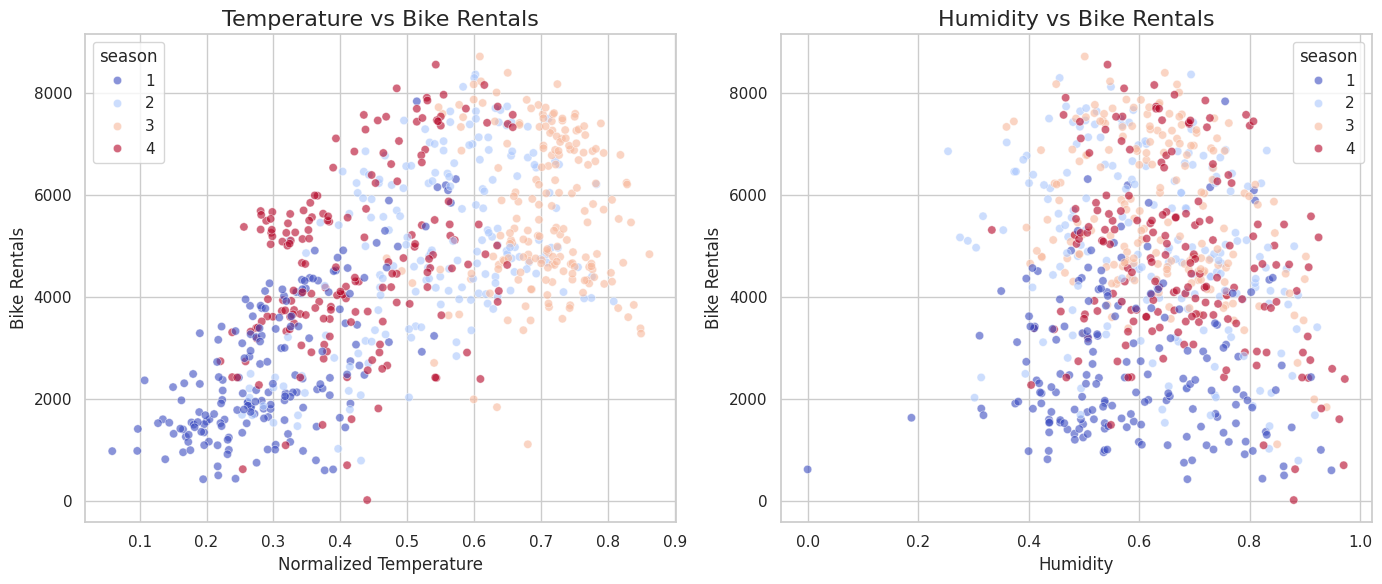

In [118]:
# Plotting the relationship between temperature, humidity, and bike rentals
plt.figure(figsize=(14, 6))

# Temperature vs Bike Rentals
plt.subplot(1, 2, 1)
sns.scatterplot(x='temp', y='cnt', data=day_df, hue='season', palette='coolwarm', alpha=0.6)
plt.title('Temperature vs Bike Rentals', fontsize=16)
plt.xlabel('Normalized Temperature', fontsize=12)
plt.ylabel('Bike Rentals', fontsize=12)

# Humidity vs Bike Rentals
plt.subplot(1, 2, 2)
sns.scatterplot(x='hum', y='cnt', data=day_df, hue='season', palette='coolwarm', alpha=0.6)
plt.title('Humidity vs Bike Rentals', fontsize=16)
plt.xlabel('Humidity', fontsize=12)
plt.ylabel('Bike Rentals', fontsize=12)

plt.tight_layout()
plt.show()

### RFM Analysis

In [119]:
# Convert the 'dteday' column to datetime format for easier date manipulation
day_df['dteday'] = pd.to_datetime(day_df['dteday'])

# Set the current date for calculating recency as the last date in the dataset
current_date = day_df['dteday'].max()

# Calculate Recency, Frequency, and Monetary (RFM) analysis

# Recency: Calculate the days since last rental for each entry
day_df['recency'] = (current_date - day_df['dteday']).dt.days

# Frequency: Group by date and count how often rentals occurred (frequency can be daily, weekly, etc.)
rfm_df = day_df.groupby('dteday').agg(
    frequency=('cnt', 'count'),  # Frequency: Number of rentals on that day
    monetary=('cnt', 'sum'),     # Monetary: Total rentals as a proxy for monetary value
    recency=('recency', 'min')   # Recency: Days since the last rental
).reset_index()

# Preview the RFM dataframe
rfm_df.head()

,dteday,frequency,monetary,recency
0,2011-01-01,1,985,730
1,2011-01-02,1,801,729
2,2011-01-03,1,1349,728
3,2011-01-04,1,1562,727
4,2011-01-05,1,1600,726


### Clustering

### manual binning

In [120]:
# Create bins for temperature (temp) and humidity (hum) for manual clustering
temp_bins = [0.0, 0.33, 0.66, 1.0]
hum_bins = [0.0, 0.33, 0.66, 1.0]

# Assign labels for the clusters
temp_labels = ['Low Temp', 'Medium Temp', 'High Temp']
hum_labels = ['Low Humidity', 'Medium Humidity', 'High Humidity']

# Create clusters based on temperature and humidity
day_df['temp_cluster'] = pd.cut(day_df['temp'], bins=temp_bins, labels=temp_labels)
day_df['hum_cluster'] = pd.cut(day_df['hum'], bins=hum_bins, labels=hum_labels)

# Create a combined cluster for temperature and humidity
day_df['combined_cluster'] = day_df['temp_cluster'].astype(str) + ' & ' + day_df['hum_cluster'].astype(str)

# Display the first few rows to see the clustering results
day_df[['temp', 'hum', 'temp_cluster', 'hum_cluster', 'combined_cluster']].head()

,temp,hum,temp_cluster,hum_cluster,combined_cluster
0,0.344167,0.805833,Medium Temp,High Humidity,Medium Temp & High Humidity
1,0.363478,0.696087,Medium Temp,High Humidity,Medium Temp & High Humidity
2,0.196364,0.437273,Low Temp,Medium Humidity,Low Temp & Medium Humidity
3,0.200000,0.590435,Low Temp,Medium Humidity,Low Temp & Medium Humidity
4,0.226957,0.436957,Low Temp,Medium Humidity,Low Temp & Medium Humidity


### k-means manual

    cnt rental_cluster
0   985    Low Rentals
1   801    Low Rentals
2  1349    Low Rentals
3  1562    Low Rentals
4  1600    Low Rentals


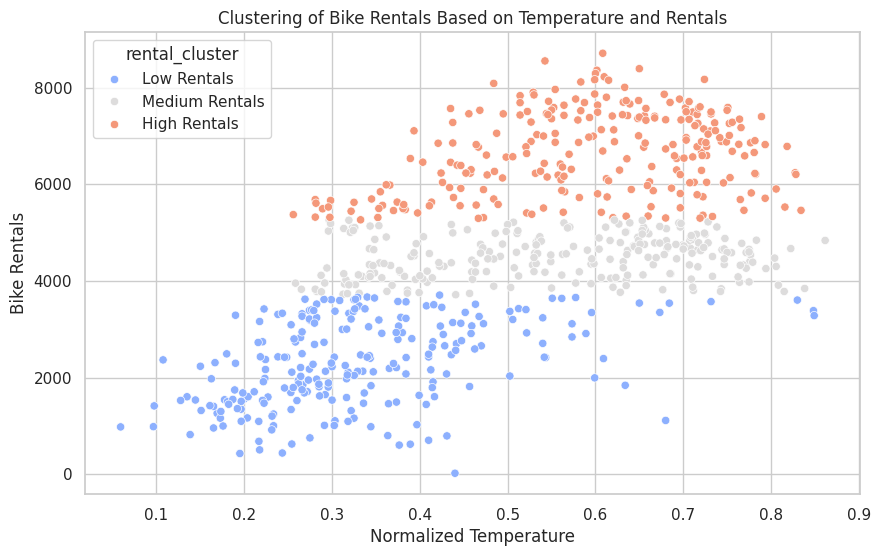

In [123]:
# Tentukan batas cluster secara manual (misalnya 3 cluster)
# Cluster 1: Rentang rendah, Cluster 2: Rentang sedang, Cluster 3: Rentang tinggi
low_threshold = day_df['cnt'].quantile(0.33)
high_threshold = day_df['cnt'].quantile(0.66)

# Fungsi untuk mengelompokkan data berdasarkan nilai cnt (jumlah sewa)
def rental_cluster(row):
    if row['cnt'] <= low_threshold:
        return 'Low Rentals'
    elif row['cnt'] <= high_threshold:
        return 'Medium Rentals'
    else:
        return 'High Rentals'

# Tambahkan kolom baru untuk cluster berdasarkan jumlah rental
day_df['rental_cluster'] = day_df.apply(rental_cluster, axis=1)

# Tampilkan beberapa baris pertama dari dataframe yang di-cluster
print(day_df[['cnt', 'rental_cluster']].head())

plt.figure(figsize=(10,6))
sns.scatterplot(x='temp', y='cnt', hue='rental_cluster', data=day_df, palette='coolwarm')
plt.title('Clustering of Bike Rentals Based on Temperature and Rentals')
plt.xlabel('Normalized Temperature')
plt.ylabel('Bike Rentals')
plt.show()

## Conclusion

- Conclution pertanyaan 1 = Musim berpengaruh besar terhadap jumlah sewa sepeda. Musim panas dan musim gugur menunjukkan puncak jumlah sewa sepeda yang lebih tinggi dibandingkan musim dingin dan musim semi. Ini bisa disebabkan oleh kondisi cuaca yang lebih menguntungkan dan waktu luang yang lebih banyak di musim-musim tersebut.
- Conclution pertanyaan 2 = Cuaca juga memainkan peran penting dalam jumlah sewa sepeda. Hari-hari cerah atau hanya berawan ringan memiliki jumlah penyewaan sepeda yang jauh lebih tinggi. Sebaliknya, kondisi cuaca yang lebih buruk seperti hujan ringan, salju ringan, atau kondisi kabut menyebabkan penurunan signifikan dalam penggunaan sepeda.

### Analisis Lanjutan


Hubungan antara suhu dan penyewaan sepeda menunjukkan bahwa ketika suhu meningkat (hingga tingkat tertentu), jumlah penyewaan juga meningkat. Orang cenderung lebih suka bersepeda dalam cuaca yang lebih hangat daripada terlalu dingin.

Hubungan antara kelembapan dan penyewaan sepeda menunjukkan pola yang lebih bervariasi. Kelembapan tinggi mungkin membuat pengguna kurang nyaman, sehingga penurunan jumlah penyewaan mungkin terjadi ketika kelembapan meningkat, meskipun ini lebih tergantung pada kondisi cuaca yang menyertai kelembapan tersebut.

Dengan informasi ini, perusahaan penyewaan sepeda dapat mengoptimalkan operasinya berdasarkan faktor musiman dan kondisi cuaca, misalnya dengan mengatur stok sepeda atau mengadakan promosi pada waktu-waktu tertentu.